# Customer Churn Analysis using Random Forest

This Telecom dataset has the following features:

1. Churn (Target Variable): Indicates whether a customer has left the service.
- 0 = Customer has not churned (retained).
- 1 = Customer has churned (left the service).

2. AccountWeeks: Represents the total number of weeks a customer has been with the company.

3. ContractRenewal: Indicates whether a customer recently renewed their contract.
- 1 = Contract renewed.
- 0 = Contract not renewed.

4. DataPlan: Indicates whether a customer is subscribed to a data plan.
- 1 = Has a data plan.
- 0 = No data plan.

5. DataUsage: Represents the amount of data (in GB) the customer used over the billing period.

6. CustServCalls: Represents the number of times a customer has contacted customer service.

7. DayMins: The total number of minutes the customer used during daytime hours.

8. DayCalls: The total number of calls made by the customer during daytime hours.

9. MonthlyCharge: The average monthly charge billed to the customer.

10. OverageFee: The amount charged to the customer for exceeding the allocated usage limits in a billing period.

11. RoamMins: The total number of minutes the customer spent on calls while roaming.

## Importing Libraries

In [61]:
import pandas as pd
import numpy as np

import seaborn as sns

from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import export_graphviz
import pydot

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [62]:
df = pd.read_csv("telecom_churn.csv")

In [63]:
# Display the first few 
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


## Exploring and Manipulating the Data

In [64]:
# Get info regarding the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [65]:
# Converting binary int64 columns to category
binary_columns = ['Churn', 'ContractRenewal', 'DataPlan']
df[binary_columns] = df[binary_columns].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Churn            3333 non-null   category
 1   AccountWeeks     3333 non-null   int64   
 2   ContractRenewal  3333 non-null   category
 3   DataPlan         3333 non-null   category
 4   DataUsage        3333 non-null   float64 
 5   CustServCalls    3333 non-null   int64   
 6   DayMins          3333 non-null   float64 
 7   DayCalls         3333 non-null   int64   
 8   MonthlyCharge    3333 non-null   float64 
 9   OverageFee       3333 non-null   float64 
 10  RoamMins         3333 non-null   float64 
dtypes: category(3), float64(5), int64(3)
memory usage: 218.6 KB
None


In [66]:
# Check changes mades
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [67]:
# Check for unique values
df.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

In [68]:
# Check for null values
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [69]:
# Check for Duplicates
print("Duplicate rows in the dataset:", df.duplicated().sum())

Duplicate rows in the dataset: 0


In [70]:
# Print Column headers
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

## Handling Outliers via Winsorizing Technique

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'AccountWeeks'),
  Text(1, 0, 'DataUsage'),
  Text(2, 0, 'CustServCalls'),
  Text(3, 0, 'DayMins'),
  Text(4, 0, 'DayCalls'),
  Text(5, 0, 'MonthlyCharge'),
  Text(6, 0, 'OverageFee'),
  Text(7, 0, 'RoamMins')])

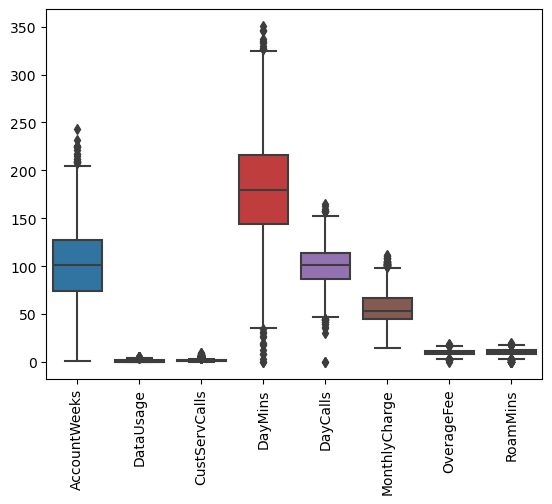

In [71]:
# Visualise outliers
sns.boxplot(data=df)
plt.xticks(rotation=90)

In [72]:
# Winsorize
for i in df:                  # where, i = column name 
    if df[i].dtypes in ("float64","int64"): 
        q1 = df[i].quantile(0.25)  
        q3 = df[i].quantile(0.75)  
        iqr = q3-q1  
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr  
        df[i].clip(lower=ll,upper=ul,inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'AccountWeeks'),
  Text(1, 0, 'DataUsage'),
  Text(2, 0, 'CustServCalls'),
  Text(3, 0, 'DayMins'),
  Text(4, 0, 'DayCalls'),
  Text(5, 0, 'MonthlyCharge'),
  Text(6, 0, 'OverageFee'),
  Text(7, 0, 'RoamMins')])

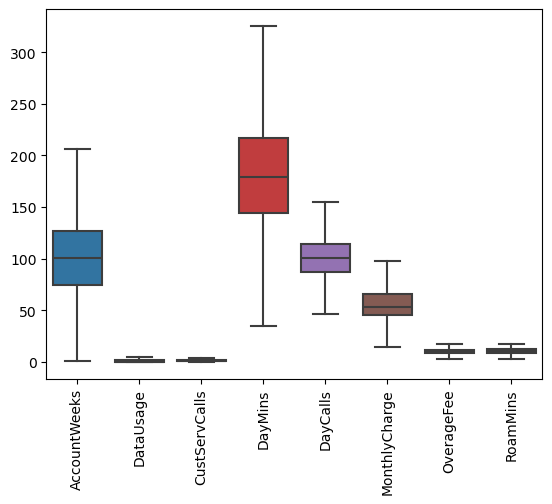

In [73]:
# Visualise changes
sns.boxplot(data=df)
plt.xticks(rotation=90)

## Data Visualization

In [74]:
bad_rate = df['Churn'].value_counts(normalize=True)
print("Bad Rate (Churn Rate):\n", bad_rate)

Bad Rate (Churn Rate):
 Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64


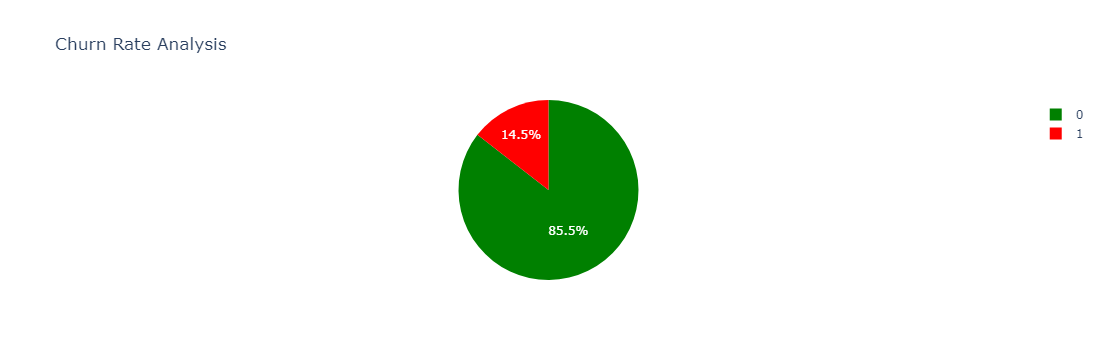

In [75]:
fig = px.pie(df, names='Churn', color='Churn',
             color_discrete_map={0: 'green', 1: 'red'},
             title='Churn Rate Analysis')
fig.show()

## Data Partition

In [76]:
# Define the feature set (X) and the target variable (y)
X = df.drop('Churn', axis = 1)
Y = df[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model - Random Forest

In [78]:
RFModel = RandomForestClassifier(random_state=20,
                               n_estimators=25,
                               criterion="gini",
                               max_depth=4,
                               min_samples_split=100,
                               min_samples_leaf=50,
                               max_features="sqrt")

RFModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=25, random_state=20)

## Feature Importance / Selection

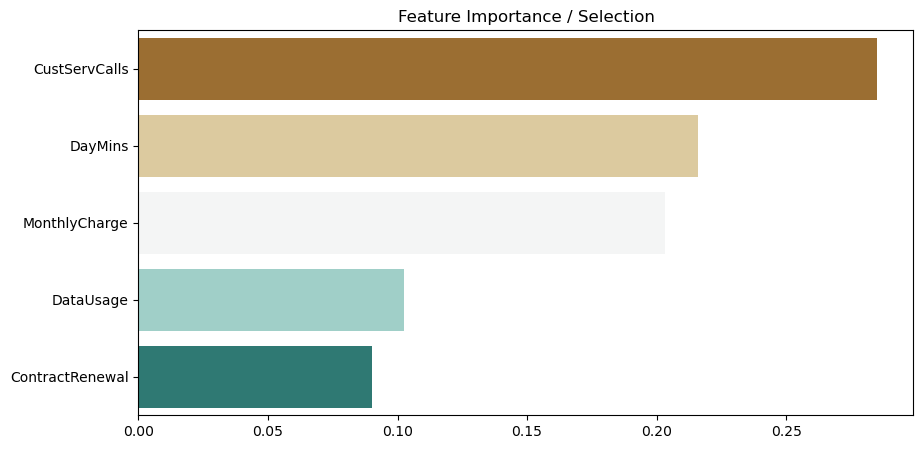

In [79]:
imp = pd.Series(data=RFModel.feature_importances_, index=RFModel.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG")

#### The top 5 Variables are    
    * CustServCalls 
    * DayMins
    * MonthlyCharge
    * DataUsage
    * ContractRenewal

## Random Forest Visualization

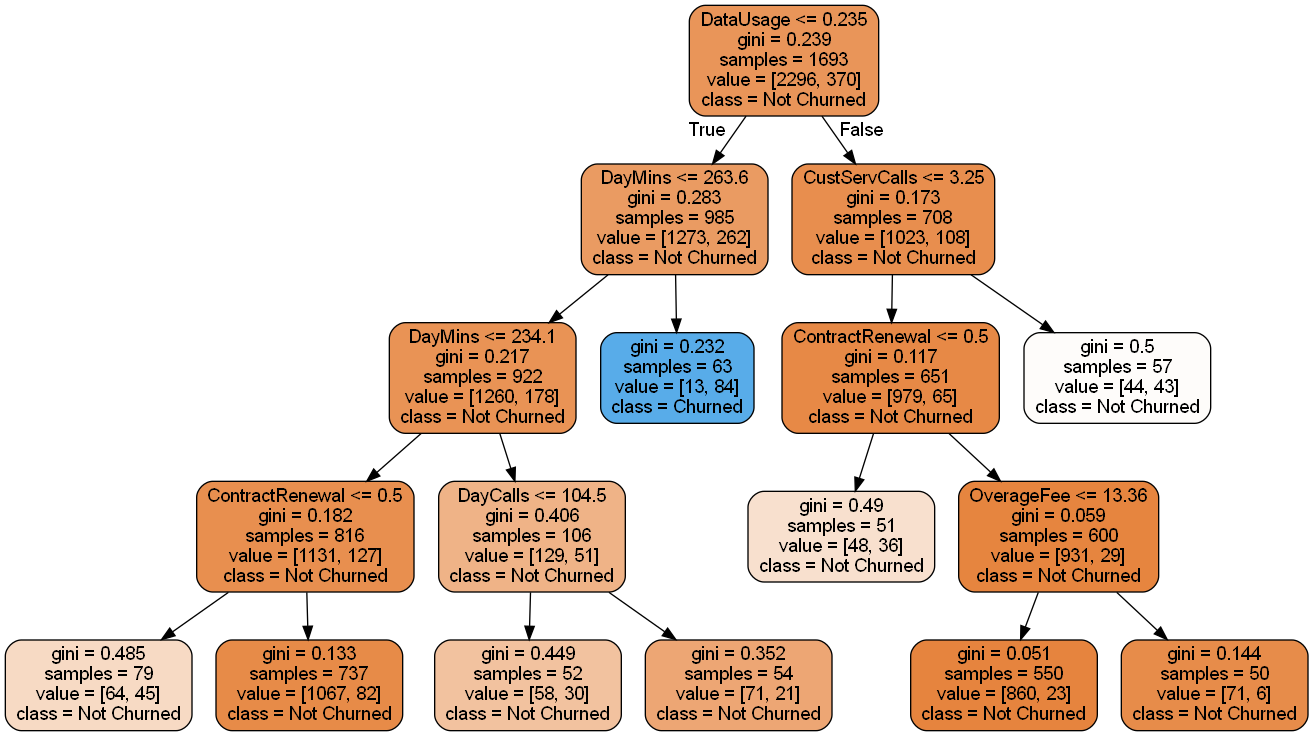

In [80]:
# Visualizing 4 trees in the Random Forest
tree = RFModel.estimators_[4]

# Exporting the tree
export_graphviz(tree, out_file='RFMTrees.dot', 
                feature_names=list(X.columns),
                class_names=['Not Churned', 'Churned'],
                rounded=True, 
                filled=True)

# Creating a graph from the dot file
graphs = pydot.graph_from_dot_file('RFMTrees.dot')

# Saving as PNG
graphs[0].write_png('random_forest_tree.png')

# Displaying the graph
from IPython.display import Image
Image(filename='random_forest_tree.png')

## Predictions on Train Dataset

In [81]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
3286,106.0,1,1,3.54,0.0,220.1,105.0,92.4,11.11,13.1,0
86,94.0,1,0,0.00,3.5,157.9,105.0,41.0,7.75,8.0,1
1349,71.0,1,1,1.51,2.0,141.4,107.0,53.1,8.15,5.6,0
1649,130.0,1,0,0.00,0.0,68.4,86.0,29.0,9.67,10.4,0
3000,87.0,1,0,0.42,3.0,223.2,109.0,53.2,6.38,14.5,0


In [82]:
train['Predicted'] = RFModel.predict(X_train)
train.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn,Predicted
3286,106.0,1,1,3.54,0.0,220.1,105.0,92.4,11.11,13.1,0,0
86,94.0,1,0,0.00,3.5,157.9,105.0,41.0,7.75,8.0,1,1
1349,71.0,1,1,1.51,2.0,141.4,107.0,53.1,8.15,5.6,0,0
1649,130.0,1,0,0.00,0.0,68.4,86.0,29.0,9.67,10.4,0,0
3000,87.0,1,0,0.42,3.0,223.2,109.0,53.2,6.38,14.5,0,0


## Model Performance Metrics for Train Data

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Predicted'],train['Churn'])
print(confusion_matrix)

[[2261  208]
 [  19  178]]


In [84]:
Accuracy_Train = ((2261+178)/(2666)*100)
print(Accuracy_Train)

91.4853713428357


In [85]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2280
           1       0.90      0.46      0.61       386

    accuracy                           0.91      2666
   macro avg       0.91      0.73      0.78      2666
weighted avg       0.91      0.91      0.90      2666



## Predictions on Test Dataset

In [86]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
601,62.0,0,0,0.00,0.0,159.7,86.0,44.0,9.88,13.9,1
2050,121.0,1,0,0.32,1.0,213.2,79.0,50.2,6.04,7.5,0
3200,100.0,0,0,0.00,1.0,107.2,98.0,26.0,4.34,9.7,0
1953,137.0,1,0,0.00,0.0,208.8,120.0,55.0,11.27,11.1,0
1119,189.0,1,0,0.00,3.0,208.3,106.0,56.0,11.84,11.3,0


In [87]:
test['Predicted'] = RFModel.predict(X_test)
test.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn,Predicted
601,62.0,0,0,0.00,0.0,159.7,86.0,44.0,9.88,13.9,1,0
2050,121.0,1,0,0.32,1.0,213.2,79.0,50.2,6.04,7.5,0,0
3200,100.0,0,0,0.00,1.0,107.2,98.0,26.0,4.34,9.7,0,0
1953,137.0,1,0,0.00,0.0,208.8,120.0,55.0,11.27,11.1,0,0
1119,189.0,1,0,0.00,3.0,208.3,106.0,56.0,11.84,11.3,0,0


## Model Performance Metrics on Test data

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Churn'])
print(confusion_matrix)

[[562  66]
 [  8  31]]


In [89]:
Accuracy_test=((562+31)/(667)*100)
Accuracy_test

88.9055472263868

In [90]:
from sklearn.metrics import classification_report
print(classification_report(test['Churn'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       570
           1       0.79      0.32      0.46        97

    accuracy                           0.89       667
   macro avg       0.84      0.65      0.70       667
weighted avg       0.88      0.89      0.87       667



## Grid Search Method 

In [91]:
params = { 'min_samples_split': [350,200,250,100],
           'min_samples_leaf': [120,50,100], 
           'max_depth':[3,4,5]} 

In [92]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [120, 50, 100],
                         'min_samples_split': [350, 200, 250, 100]},
             verbose=1)

In [93]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       random_state=42)

## Live Data

In [94]:
Live_data = X_test.iloc[0:4,:]
Live_data

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
601,62.0,0,0,0.00,0.0,159.7,86.0,44.0,9.88,13.9
2050,121.0,1,0,0.32,1.0,213.2,79.0,50.2,6.04,7.5
3200,100.0,0,0,0.00,1.0,107.2,98.0,26.0,4.34,9.7
1953,137.0,1,0,0.00,0.0,208.8,120.0,55.0,11.27,11.1


In [95]:
Live_data['Predicted'] = RFModel.predict(Live_data)
Live_data

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Predicted
601,62.0,0,0,0.00,0.0,159.7,86.0,44.0,9.88,13.9,0
2050,121.0,1,0,0.32,1.0,213.2,79.0,50.2,6.04,7.5,0
3200,100.0,0,0,0.00,1.0,107.2,98.0,26.0,4.34,9.7,0
1953,137.0,1,0,0.00,0.0,208.8,120.0,55.0,11.27,11.1,0


* 0 = customer will not churn
* 1 = Customer will Churn

In [96]:
print(classification_report(train['Churn'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2280
           1       0.90      0.46      0.61       386

    accuracy                           0.91      2666
   macro avg       0.91      0.73      0.78      2666
weighted avg       0.91      0.91      0.90      2666



## Model Export

In [97]:
import pickle

pickle.dump(RFModel, open(r'C:\Users\reeti\Desktop\ITM Notes & Assignments\Sem 3\Random Forest.pkl','wb'))